# 

In [40]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

F = len("Adrian")
L = len("Świrszcz")

### Excercise 1 -  Generated Quantities Block
1. Compile code_1.stan and sample from it using M=F
2. Create a pandas dataframe from resulting draws.
3. Plot a histogram for each of y_sim and lambda

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


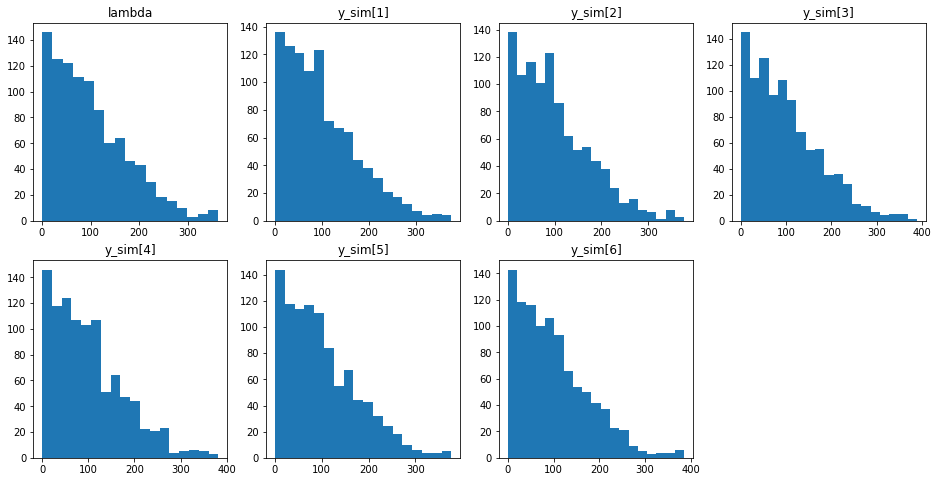

In [41]:
# Compile stan code
gen_quant = CmdStanModel(stan_file='code_1.stan')

samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

# Create pandas dataframe
df = samples.draws_pd()

# Plot histoframs
ncols = 4
nrows = math.ceil(F/4)
theo_len = nrows * ncols
actu_len = len(df.columns[2:])
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4*nrows))
for i in range(theo_len):
    r = i // ncols
    c = i % ncols
    if i >= actu_len:
        axs[r, c].axis("off")
    else:
        axs[r, c].hist(df.iloc[:, i+2], bins="auto")
        axs[r, c].set_title(df.columns[i+2])
plt.show()

### Excercise 2 - Constraints on the data 
1. Observe how constraints on data behave for code_2 and code_3

In [42]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})
df_1 = samp_bern1.draws_pd()
display(df_1.describe())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.0,4000.000000,4000.000000
mean,-3.355603,0.914629,0.966372,1.36750,2.388000,0.0,3.854745,0.508821
std,0.831992,0.132618,0.071578,0.48888,1.118825,0.0,1.098847,0.226082
min,-11.458600,0.190211,0.863053,1.00000,1.000000,0.0,2.772800,0.010111
25%,-3.549825,0.885867,0.924659,1.00000,1.000000,0.0,3.068318,0.334690
50%,-3.040540,0.973606,0.972697,1.00000,3.000000,0.0,3.502010,0.513059
75%,-2.829433,1.000000,1.014410,2.00000,3.000000,0.0,4.288863,0.684445
max,-2.772590,1.000000,1.057040,3.00000,7.000000,0.0,12.716300,0.996740


In [43]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})
df_2 = samp_bern2.draws_pd()
display(df_2.describe())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000
mean,-3.326252,0.920061,0.959587,1.386500,2.404000,0.0,3.807495,0.498989
std,0.785982,0.125076,0.031439,0.496165,1.108644,0.0,1.048368,0.222097
min,-10.092800,0.147437,0.906250,1.000000,1.000000,0.0,2.772780,0.010221
25%,-3.498945,0.893411,0.953861,1.000000,1.000000,0.0,3.049320,0.330369
50%,-3.017720,0.973993,0.972457,1.000000,3.000000,0.0,3.485355,0.500731
75%,-2.827987,1.000000,0.978182,2.000000,3.000000,0.0,4.215262,0.670195
max,-2.772590,1.000000,0.987184,3.000000,7.000000,0.0,11.259300,0.993526


Constraining data doesn't do anything, since passing incorrect data (for example y[1] = 2) into either of the functions results in an error.

### Excercise 3 - Constraints on parameters
1. Constraints in parameters behave more subtely. We are infering theta without data from its prior.
2. Please see diagnostic messages from code_4 and how samples from it compare to the probability distribution.
3. Verify what changes if constraints are added as in code_5

### Unconstrained parameters

In [44]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▉        | 00:00 Iteration: 1100 / 7000 [ 15%]  (Sampling)



chain 1 |███▌      | 00:00 Iteration: 2300 / 7000 [ 32%]  (Sampling)


chain 1 |████▌     | 00:00 Iteration: 3000 / 7000 [ 42%]  (Sampling)


chain 1 |█████▎    | 00:00 Iteration: 3500 / 7000 [ 50%]  (Sampling)


chain 1 |█████▊    | 00:01 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |██████▍   | 00:01 Iteration: 4300 / 7000 [ 61%]  (Sampling)


chain 1 |██████▉   | 00:01 Iteration: 4700 / 7000 [ 67%]  (Sampling)


chain 1 |███████▌  | 00:01 Iteration: 5100 / 7000 [ 72%]  (Sampling)


chain 1 |████████  | 00:01 Iteration: 5500 / 7000 [ 78%]  (Sampling)


chain 1 |████████▌ | 00:01 Iteration: 5900 / 7000 [ 84%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 6200 / 7000 [ 88%]  (Sampling)


chain 1 |█████████▍| 00:01 Iteration: 6500 / 7000 [ 92%]  (Sampling)


chain 1 |█████████

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Lab_2/samples/code_4-20230319221541_1.csv, /home/Lab_2/samples/code_4-20230319221541_2.csv, /home/Lab_2/samples/code_4-20230319221541_3.csv, /home/Lab_2/samples/code_4-20230319221541_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

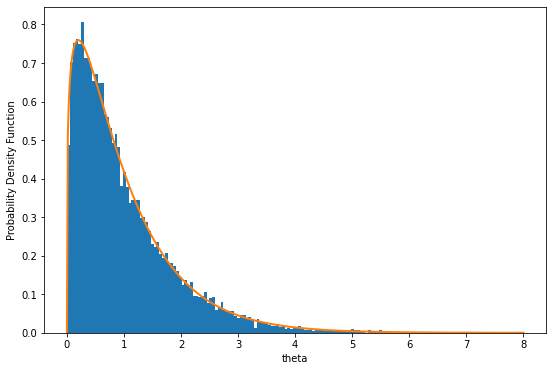

In [45]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 
df = out_gamma1.draws_pd()

plt.figure(figsize=(9, 6))
plt.hist(df["theta"], bins=160, density=True)
plt.plot(xs, pdfs, linewidth=2)
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

### Constrained parameter

In [46]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)

chain 1 |███▍      | 00:00 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |████▍     | 00:00 Iteration: 2900 / 7000 [ 41%]  (Sampling)


chain 1 |█████▏    | 00:00 Iteration: 3400 / 7000 [ 48%]  (Sampling)


chain 1 |█████▋    | 00:01 Iteration: 3800 / 7000 [ 54%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 4200 / 7000 [ 60%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 4600 / 7000 [ 65%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 5000 / 7000 [ 71%]  (Sampling)


chain 1 |███████▊  | 00:01 Iteration: 5300 / 7000 [ 75%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 5600 / 7000 [ 80%]  (Sampling)


chain 1 |████████▌ | 00:01 Iteration: 5900 / 7000 [ 84%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 6200 / 7000 [ 88%]  (Sampling)


chain 1 |█████████▍


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Lab_2/samples/code_5-20230319221544_1.csv, /home/Lab_2/samples/code_5-20230319221544_2.csv, /home/Lab_2/samples/code_5-20230319221544_3.csv, /home/Lab_2/samples/code_5-20230319221544_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

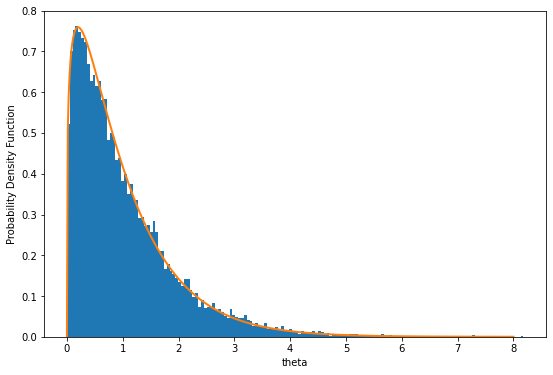

In [47]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 
df = out_gamma2.draws_pd()

plt.figure(figsize=(9, 6))
plt.hist(df["theta"], bins=160, density=True)
plt.plot(xs, pdfs, linewidth=2)
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

### Excercise 4 -  Selection of parameters using equation solving
1. Stan outside of sampling allows for certain computational tools. In particular equation solving.
2. Using code_6 find the standard deviation of half_normal distribution, such that with 99% probability samples from it will be less than (F+L)/2.

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


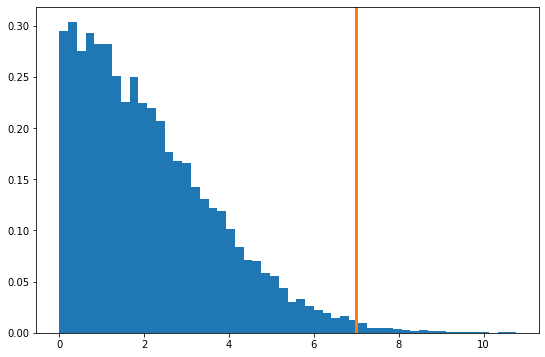

In [48]:
model_tune = CmdStanModel(stan_file='code_6.stan')
y0 = 1  # initial guess for the equation solving
data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

sigma = tunes.draws_pd().iloc[0, 2]
distribution = np.abs(np.random.normal(0, sigma, 10000))

plt.figure(figsize=(9, 6))
plt.hist(distribution, bins="auto", density=True)
axes = plt.gca()
ylim = axes.get_ylim()
plt.plot([(F+L)/2, (F+L)/2,], [0, 1], linewidth=3)
axes.set_ylim(ylim)
plt.show()

### Excercise 5 - different methods of defining models
1. Implement all the examples
2. Use them to generate distributuion for N=F.

In [49]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 24052000 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data, seed=seed)
result_2 = model_log_target.sample(data=data, seed=seed)
result_3 = model_log_target_ind.sample(data=data, seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


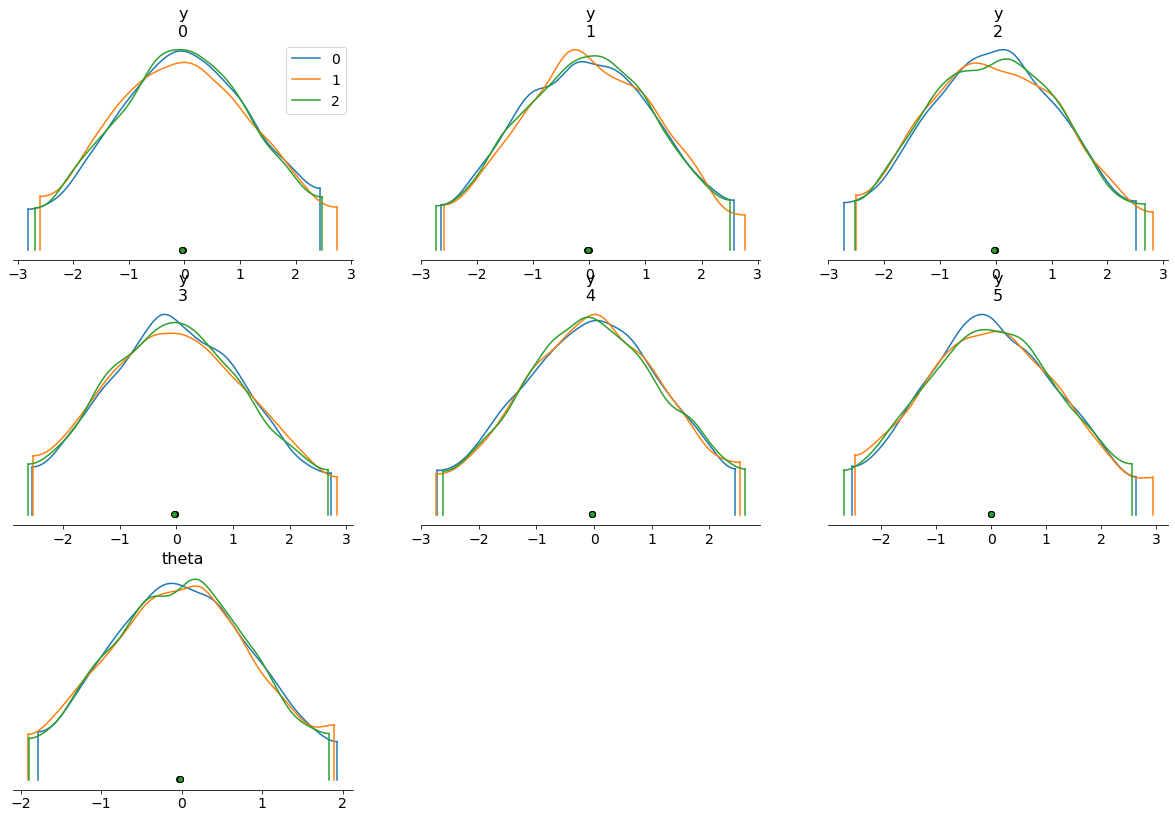

In [50]:
az.plot_density([result_1,result_2,result_3])
plt.show()

### Excercise 6 - generated quantities post sampling
1. Implement ```code_10.stan```
2. Using generate_quantities() method use samples from previous excercises and and analyze mean of $y$.

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done pro

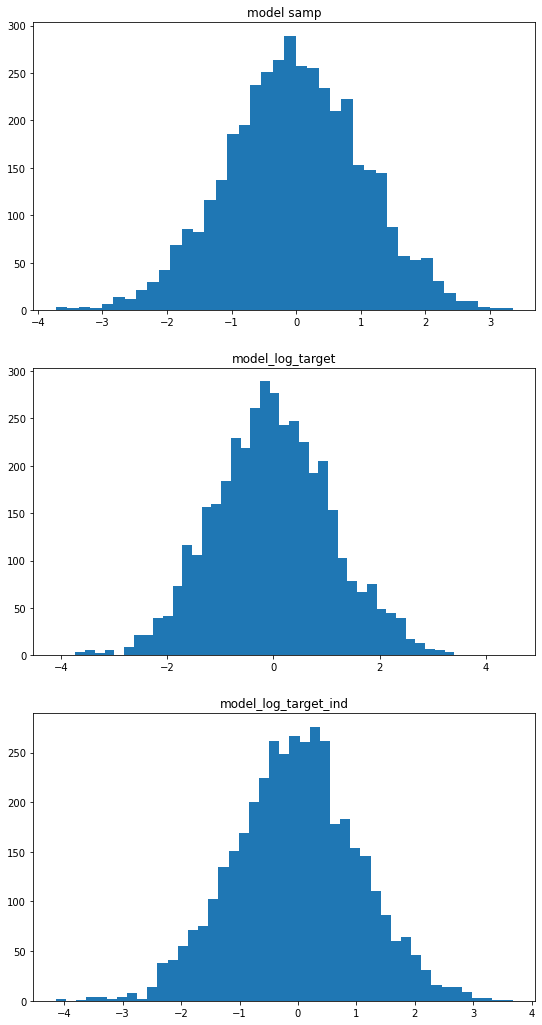

In [51]:
# Get samples
model_gq = CmdStanModel(stan_file='code_10.stan')
mean_list = []
for result in [result_1, result_2, result_3]:
    mean_of_y = model_gq.generate_quantities(data=data, mcmc_sample=result)
    mean_list.append(mean_of_y.draws_pd().iloc[:, 0])

# Plot data
titles = ["model samp", "model_log_target", "model_log_target_ind"]
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 18))
for i in range(3):
    axs[i].hist(mean_list[i], bins="auto")
    axs[i].set_title(titles[i])
plt.show()